
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 4
-----

In [293]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

set2_cols = sns.color_palette("Set2")

-----
##### Set up input / output directories

In [294]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [295]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [296]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [297]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 69), (577, 69))

In [526]:
kzm611_sigs[kzm611_sigs.SBS11>0].index.tolist()

['IID_H136433_T07_01_WG01',
 'IID_H156407_T01_01_WG01',
 'KiCS0013_319375',
 'KiCS0155_314807',
 'KiCS0299_19_3794',
 'KiCS0306_19_19567_A_02_00',
 'zcc158',
 'zcc176',
 'zcc218',
 'zcc235',
 'zcc250',
 'IID_H158186_T02_01_WG01',
 'KiCS0219_18_1752',
 'KiCS0284_20_18306_A_02_00',
 'KiCS0352_19_17420_A_02_00',
 'KiCS0388_20_8809_A_02_00',
 'zcc208',
 'zcc231']

In [527]:
(6213+116620) / kzm611_sigs[[x for x in kzm611_sigs.columns if x.startswith('SBS')]].sum().sum()

0.008219784564326926

In [298]:
thr_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5', 'SBS288H5']
thr_nhm_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']
cos_plat_sbs = ['SBS31', 'SBS35']
cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
all_plat_sbs = ['SBS31', 'SBS35', 'SBS288L5']
all_plat_sigs = ['SBS31', 'SBS35', 'SBS288L5', 'DBS5', 'DBS78H2']

cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
plat_sigs = ['SBS31', 'SBS35', 'DBS5', 'DBS78H2', 'SBS288L5']
ncos_plat_sigs = ['DBS78H2', 'SBS288L5', 'DBS2', 'DBS6', 'ID3']
ncos1_plat_sigs = ['DBS78H2', 'SBS288L5', 'ID3']
ncos2_plat_sigs = ['DBS2', 'DBS6']
plat_enr_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']
plat_enr_thr_nonID = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6']
plat_enr_sbs = ['SBS35', 'SBS31', 'SBS288L5']
plat_enr_dbs = ['DBS78H2', 'DBS5', 'DBS2', 'DBS6']
plat_enr_id = ['ID3']


cos_plat_sbs = kzm611_sigs[['SBS31', 'SBS35']].copy()
cos_plat_all = kzm611_sigs[['SBS31', 'SBS35', 'DBS5']].copy()
all_plat_sigs = kzm611_sigs[plat_enr_thr_sigs].copy()
all_plat_sbs = kzm611_sigs[plat_enr_sbs].copy()
all_plat_dbs = kzm611_sigs[plat_enr_dbs].copy()
all_plat_id = kzm611_sigs[plat_enr_id].copy()

In [299]:
ncos_df = kzm611_sigs[ncos_plat_sigs].copy()
ncos_df['Total'] = ncos_df.sum(axis=1)

In [539]:
kzm_plat_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_plats_days_dose.txt'), sep='\t')
kzm_plat_df.head(2)

,Sample_id,Metastatic,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin
0,KiCS0002_321321,Y,KiCS0002,GCT,858,500.0,4200.0,0,Y,Y,N
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,400.0,0.0,0,Y,N,N


In [540]:
kzm_plat_df.shape

(141, 11)

In [541]:
kzm_plat_df['SBS'] = [kzm611_md.loc[x, 'SBS'] for x in kzm_plat_df.Sample_id]

scaler = MinMaxScaler()
kzm_plat_df.Cisplatin_dose = scaler.fit_transform(kzm_plat_df.Cisplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Carboplatin_dose = scaler.fit_transform(kzm_plat_df.Carboplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Oxaliplatin_dose = scaler.fit_transform(kzm_plat_df.Oxaliplatin_dose.values.reshape(-1,1)).flatten()

kzm_plat_df['Size'] = ((kzm_plat_df.Cisplatin_dose+kzm_plat_df.Carboplatin_dose+kzm_plat_df.Oxaliplatin_dose)/2) * 2000
#kzm_plat_df['Size'] = 500
kzm_plat_df['Days_log'] = np.log10(kzm_plat_df.Days_from+0.00000000001)
kzm_plat_df['SBS_log'] = np.log10(kzm_plat_df.SBS+0.00000000001)

kzm_plat_df.shape

(141, 15)

In [542]:
kzm_plat_df.head()

,Sample_id,Metastatic,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,15207,834.776335,2.933487,4.182044
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,3842,158.730159,3.062206,3.584557
2,KiCS0008_289185,Y,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,17184,542.986425,2.789581,4.235124
3,KiCS0010_270645,Y,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,6761,47.619048,0.477121,3.830011
4,KiCS0010_270646,N,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,251,95.238095,1.875061,2.399674


In [543]:
all_plat_sigs_df = kzm_plat_df.copy()

all_plat_sigs_df['Platin_sig'] = ['Y' if x in all_plat_sigs.loc[(all_plat_sigs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_sbs'] = ['Y' if x in all_plat_sbs.loc[(all_plat_sbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_dbs'] = ['Y' if x in all_plat_dbs.loc[(all_plat_dbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_id'] = ['Y' if x in all_plat_id.loc[(all_plat_id > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]


all_plat_sigs_df.rename(columns={'Type': 'Tumor'}, inplace=True)
all_plat_sigs_df['Total_drugs'] = all_plat_sigs_df.Cisplatin + all_plat_sigs_df.Carboplatin + all_plat_sigs_df.Oxaliplatin

all_plat_sigs_df['cos_total'] = [all_plat_sigs.loc[x, cos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['nonCos_total'] = [all_plat_sigs.loc[x, ncos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]

all_plat_sigs_df.tail(2)

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
139,IID_H156418_T01_01_WG01,N,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,...,0.0,2.817565,3.162564,Y,Y,N,N,NYN,262.0,255.0
140,IID_H158493_T01_01_WG01,N,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,...,0.0,2.079181,3.702172,Y,Y,Y,N,YNN,0.0,1258.0


In [544]:
all_plat_sigs.loc[x, cos_plat_sigs]

SBS31    10876.0
SBS35     4226.0
DBS5       152.0
Name: KiCS0002_321321, dtype: float64

In [305]:
topQuad = all_plat_sigs_df[(all_plat_sigs_df.SBS>1453) & (all_plat_sigs_df.Days_from>90)]
topQuad.to_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index=None)

In [545]:
topr_quad = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index_col=0)
topr_quad2 = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_topRight_quad_v2.tsv', sep='\t', index_col=0)
topr_quad.Platin_sig.value_counts(), topr_quad2.Platin_sig.value_counts()

(Platin_sig
 Y    81
 N    30
 Name: count, dtype: int64,
 Platin_sig
 Y    70
 N    41
 Name: count, dtype: int64)

In [546]:
all_plat_md = all_plat_sigs_df.copy().set_index('Sample_id')
all_plat_md['Thre_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_md.index]
all_plat_md.to_csv(os.path.join(root_dir, 'source_data/KiCS_plat_state.tsv'), sep='\t')

In [547]:
all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].head()

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,...,834.776335,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,...,158.730159,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0
2,KiCS0008_289185,Y,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,...,542.986425,2.789581,4.235124,Y,N,Y,N,NNY,110.0,47.0
3,KiCS0010_270645,Y,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,...,47.619048,0.477121,3.830011,N,N,N,N,YNN,0.0,0.0
4,KiCS0010_270646,N,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,...,95.238095,1.875061,2.399674,N,N,N,N,YNN,0.0,0.0


-----------
## Panel a

In [548]:
plat_df2plot.head()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,...,834.776335,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,...,158.730159,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,...,542.986425,2.789581,4.235124,Y,N,Y,N,NNY,110.0,47.0
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,...,47.619048,0.477121,3.830011,N,N,N,N,YNN,0.0,0.0
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,...,95.238095,1.875061,2.399674,N,N,N,N,YNN,0.0,0.0


In [369]:
pp_dose = plat_df2plot.copy()
pp_dose['Total_dose'] = pp_dose.Cisplatin_dose + pp_dose.Carboplatin_dose + pp_dose.Oxaliplatin_dose

In [372]:
pp_dose = pp_dose[pp_dose.Total_dose>0]

In [373]:
ppos = pp_dose[pp_dose.cos_total+pp_dose.nonCos_total>0].copy()
pneg = pp_dose[pp_dose.cos_total+pp_dose.nonCos_total==0].copy()
len(ppos), len(pneg)

(74, 60)

In [507]:
pt_samples = kzm611_md[kzm611_md.Thr_State=='Primary-Treated'].index.tolist()
at_samples = kzm611_md[kzm611_md.Thr_State=='Advanced-Treated'].index.tolist()

In [508]:
pt_df = pp_dose[pp_dose.Sample_id.isin(pt_samples)].copy()
at_df = pp_dose[pp_dose.Sample_id.isin(at_samples)].copy()
len(pt_df), len(at_df)

(36, 98)

In [516]:
pt_sn_df = pp_dose[(pp_dose.Sample_id.isin(pt_samples)) & (pp_dose.cos_total+pp_dose.nonCos_total==0)].copy()
pt_sp_df = pp_dose[(pp_dose.Sample_id.isin(pt_samples)) & (pp_dose.cos_total+pp_dose.nonCos_total>0)].copy()
at_sn_df = pp_dose[(pp_dose.Sample_id.isin(at_samples)) & (pp_dose.cos_total+pp_dose.nonCos_total==0)].copy()
at_sp_df = pp_dose[(pp_dose.Sample_id.isin(at_samples)) & (pp_dose.cos_total+pp_dose.nonCos_total>0)].copy()
len(pt_sn_df), len(pt_sp_df), len(at_sn_df), len(at_sp_df)

(26, 10, 34, 64)

In [374]:
ppos['Total_dose'] = ppos.Cisplatin_dose + ppos.Carboplatin_dose + ppos.Oxaliplatin_dose
pneg['Total_dose'] = pneg.Cisplatin_dose + pneg.Carboplatin_dose + pneg.Oxaliplatin_dose

In [509]:
pt_df['Total_dose'] = pt_df.Cisplatin_dose + pt_df.Carboplatin_dose + pt_df.Oxaliplatin_dose
at_df['Total_dose'] = at_df.Cisplatin_dose + at_df.Carboplatin_dose + at_df.Oxaliplatin_dose

In [375]:
ppos.Cisplatin_dose.mean(), ppos.Carboplatin_dose.mean(), ppos.Oxaliplatin_dose.mean(), ppos.Total_dose.mean(), ppos.Total_dose.median()

(0.155425502256006,
 0.1136936936936937,
 0.02085116790999144,
 0.2899703638596912,
 0.2265873015873016)

In [376]:
pneg.Cisplatin_dose.mean(), pneg.Carboplatin_dose.mean(), pneg.Oxaliplatin_dose.mean(), pneg.Total_dose.mean(), pneg.Total_dose.median()

(0.09790436507936509,
 0.08448598484848485,
 0.0,
 0.18239034992784992,
 0.15873015873015872)

In [459]:
cos_pos = kzm611_sigs[kzm611_sigs.SBS31+kzm611_sigs.SBS35+kzm611_sigs.DBS5>0].index.tolist()

In [474]:
## Load therapy data at class and individual drug levels
class_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_classes_NY.txt'), sep='\t', index_col=0)
drugs_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_therapy_individuals_counts.txt'), sep='\t', index_col=0)

drugs_df = drugs_df.apply(lambda x: ['Y' if y > 0 else 'N' for y in x])
drugs_df = drugs_df.drop([x for x in drugs_df.columns if 'Y' not in drugs_df[x].tolist()], axis=1)

In [475]:
class_df[class_df.Platinums=="Y"].shape, drugs_df[(drugs_df.Cisplatin=='Y') | (drugs_df.Carboplatin=='Y') | (drugs_df.Oxaliplatin=='Y')].shape

((173, 16), (146, 85))

In [476]:
len([x for x in class_df[class_df.Platinums=="Y"].index.tolist() if x in cos_pos])

71

In [477]:
kzm611_md.loc[[x for x in class_df[class_df.Platinums=="Y"].index.tolist()]].Thr_State.value_counts()

Thr_State
Advanced-Treated    119
Primary-Treated      54
Name: count, dtype: int64

In [473]:
[x for x in class_df[class_df.Platinums=="Y"].index.tolist() if x.startswith('KiCS0228')]

['KiCS0228_18_7579']

In [467]:
ppll = kzm611_md.loc[[x for x in class_df[class_df.Platinums=="Y"].index.tolist()]].copy()
ppll[ppll.Thr_State=='Advanced-Naive']

,Patient_id,Cohort,State,Therapy,Sex,Type,Tumor_class,SBS,DBS,ID,Thr_State,Burden,Radiation
Sample_id,,,,,,,,,,,,,
KiCS0228_18_7579,KiCS0228,KiCS,Non-Primary,Pre-Therapy,Female,MAO,Solid,9411,291,1062,Advanced-Naive,low,N


In [472]:
kzm611_sigs.loc['KiCS0228_18_7577', ['SBS31', 'SBS35', 'DBS5']]

SBS31    0.0
SBS35    0.0
DBS5     0.0
Name: KiCS0228_18_7577, dtype: float64

In [478]:
kzm611_md.loc[[x for x in class_df[class_df.Platinums=="Y"].index.tolist() if x in cos_pos]].Thr_State.value_counts()

Thr_State
Advanced-Treated    62
Primary-Treated      9
Name: count, dtype: int64

In [460]:
[x for x in cos_pos if x not in class_df[class_df.Platinums=="Y"].index.tolist()]

['I-H-133673-T2-1-D1-1',
 'I-H-135420-T1-2-D1-1',
 'I-H-136134-T1-1-D1-1',
 'IID_H158182_T01_01_WG01',
 'KiCS0030_273368',
 'KiCS0306_19_19567_A_02_00',
 'zcc5',
 'zcc22',
 'zcc77',
 'zcc107',
 'zcc132',
 'zcc377',
 'I-H-135462-T1-2-D1-1']

In [461]:
kzm611_sigs.loc[[x for x in cos_pos if x not in class_df[class_df.Platinums=="Y"].index.tolist()], ['SBS31', 'SBS35', 'DBS5']]

,SBS31,SBS35,DBS5
I-H-133673-T2-1-D1-1,1321,0,65.0
I-H-135420-T1-2-D1-1,569,0,0.0
I-H-136134-T1-1-D1-1,4590,3298,68.0
IID_H158182_T01_01_WG01,1632,1201,0.0
KiCS0030_273368,0,0,32.0
KiCS0306_19_19567_A_02_00,0,0,36.0
zcc5,1119,0,0.0
zcc22,2345,0,35.0
zcc77,1159,0,0.0
zcc107,278,0,0.0


In [462]:
kzm611_md.loc[[x for x in cos_pos if x not in class_df[class_df.Platinums=="Y"].index.tolist()]]

,Patient_id,Cohort,State,Therapy,Sex,Type,Tumor_class,SBS,DBS,ID,Thr_State,Burden,Radiation
Sample_id,,,,,,,,,,,,,
I-H-133673-T2-1-D1-1,IID_H133673,MSK,Non-Primary,Post-Therapy,Male,WT,Solid,8306,126,469,Advanced-Treated,low,Y
I-H-135420-T1-2-D1-1,I-H-135420,MSK,Primary,Post-Therapy,Male,DSRC,Solid,4885,77,602,Primary-Treated,low,Y
I-H-136134-T1-1-D1-1,IID_H136134,MSK,Non-Primary,Post-Therapy,Male,NBL,Solid,15495,207,1058,Advanced-Treated,low,Y
IID_H158182_T01_01_WG01,IID_H158182,MSK,Non-Primary,Post-Therapy,Male,NBL,Solid,3914,139,1469,Advanced-Treated,low,N
KiCS0030_273368,KiCS0030,KiCS,Non-Primary,Post-Therapy,Female,GS,CNS,7940,83,802,Advanced-Treated,low,Y
KiCS0306_19_19567_A_02_00,KiCS0306,KiCS,Non-Primary,Post-Therapy,Male,HGG,CNS,7344,36,464,Advanced-Treated,low,Y
zcc5,P000105,ZCC,Non-Primary,Post-Therapy,Male,NBL,Solid,9011,105,681,Advanced-Treated,low,L
zcc22,P000305,ZCC,Non-Primary,Post-Therapy,Female,AML,Blood,6895,138,536,Advanced-Treated,low,L
zcc77,P001106,ZCC,Non-Primary,Post-Therapy,Female,NBL,Solid,10232,82,633,Advanced-Treated,low,Y


In [449]:
kzm611_sigs[kzm611_sigs.SBS31+kzm611_sigs.SBS35+kzm611_sigs.DBS5>0].shape, \
kzm611_sigs[kzm611_sigs.SBS31+kzm611_sigs.SBS35>0].shape, \
kzm611_sigs_low[kzm611_sigs_low.SBS31+kzm611_sigs_low.SBS35+kzm611_sigs_low.DBS5>0].shape

((84, 69), (77, 69), (80, 69))

In [450]:
kzm611_md.loc[kzm611_sigs[kzm611_sigs.SBS31+kzm611_sigs.SBS35+kzm611_sigs.DBS5>0].index.tolist()].Thr_State.value_counts()

Thr_State
Advanced-Treated    72
Primary-Treated     12
Name: count, dtype: int64

In [442]:
kzm611_md.loc[plat_df2plot.Sample_id.tolist()].Thr_State.value_counts()

Thr_State
Advanced-Treated    103
Primary-Treated      38
Name: count, dtype: int64

In [440]:
kzm611_md.loc[plat_df2plot[plat_df2plot.cos_total>0].Sample_id.tolist()].Thr_State.value_counts()

Thr_State
Advanced-Treated    56
Primary-Treated      9
Name: count, dtype: int64

In [ ]:
pp_dose.cos_total+pp_dose.nonCos_total>0

In [597]:
print(plat_df2plot.Size.tolist())

[834.7763347763347, 158.73015873015873, 542.9864253393666, 47.61904761904761, 95.23809523809523, 142.85714285714286, 141.46825396825398, 76.5873015873016, 416.3059163059163, 158.73015873015873, 431.5692640692641, 431.5692640692641, 479.1883116883117, 386.002886002886, 386.002886002886, 89.28571428571429, 333.1746031746032, 416.3059163059163, 190.6132756132756, 243.27561327561327, 158.73015873015873, 158.73015873015873, 158.73015873015873, 380.9523809523809, 295.4545454545455, 79.36507936507937, 119.04761904761904, 338.1818181818182, 157.93650793650792, 158.73015873015873, 75.75757575757576, 75.75757575757576, 1000.0, 1000.0, 238.09523809523807, 253.96825396825395, 53.96825396825397, 53.96825396825397, 53.96825396825397, 253.96825396825395, 314.24242424242425, 484.8484848484849, 257.57575757575756, 158.73015873015873, 113.63636363636363, 190.99907170634918, 158.73015873015873, 158.73015873015873, 96.21825396825396, 73.63888888888889, 158.73015873015873, 227.27272727272725, 161.380952380

In [612]:
plat_df2plot.SBS_log.min()

2.3996737214810553

(141, 23)



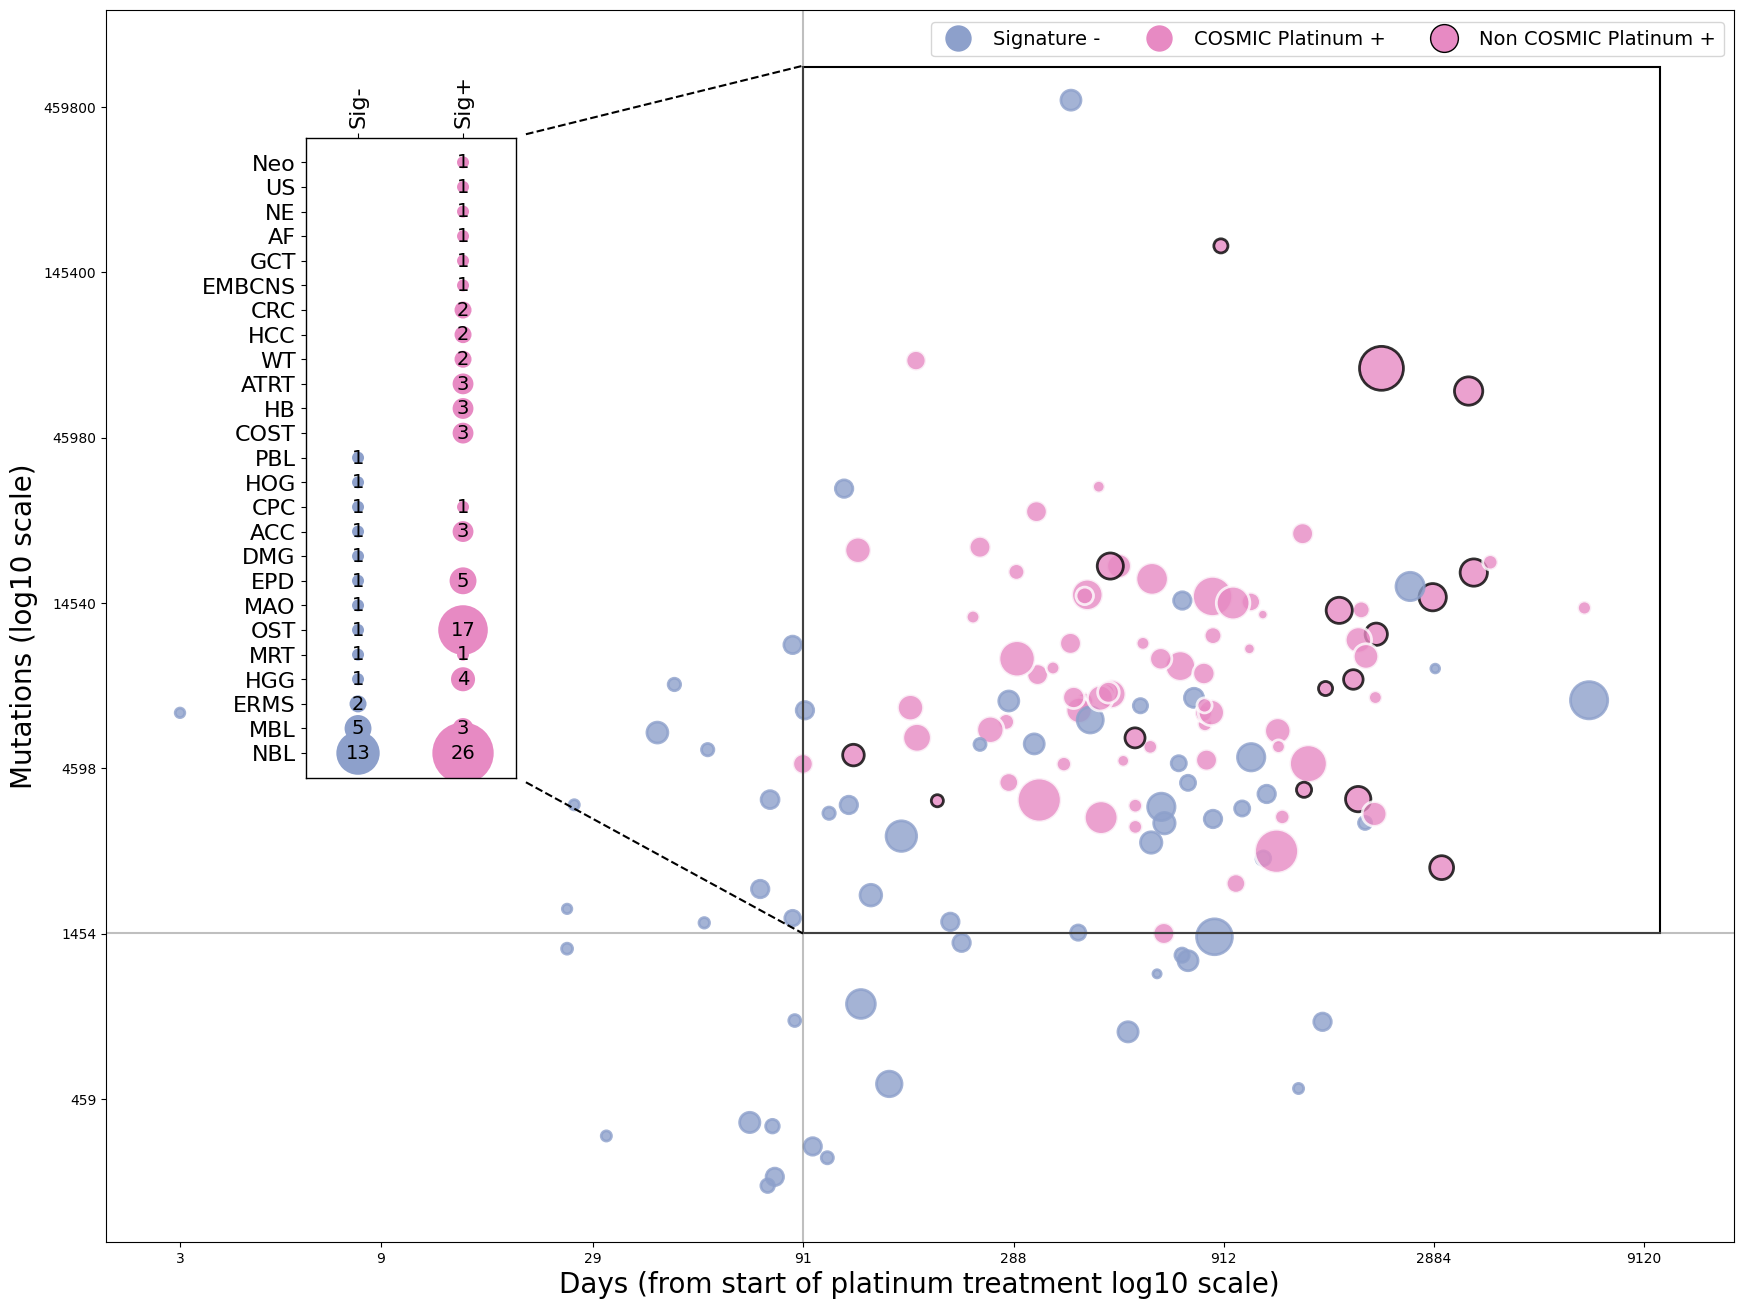

In [ ]:
pcols = []

plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in plat_df2plot.Platin_sig]

if len(plat_df2plot[plat_df2plot.Size == 0]) > 0:
    nonzero_mean = plat_df2plot[plat_df2plot.Size > 0].Size.mean()
    plat_df2plot.Size = [x if x>0 else nonzero_mean for x in plat_df2plot.Size]

for r in range(plat_df2plot.shape[0]):
    if plat_df2plot.cos_total.iloc[r] > 0:
        pcols.append('white')
    elif plat_df2plot.nonCos_total.iloc[r] > 0:
        pcols.append('black')
    else:
        pcols.append(set2_cols[2])


f, ax = plt.subplots(figsize=(21,16))

ax.scatter(plat_df2plot.Days_log, plat_df2plot.SBS_log,
                     c=plat_df2plot.color,
                     linewidth=2,
                     s=plat_df2plot.Size,
                     edgecolor=pcols,
                     alpha=0.8)


custom_lines = [Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], mec='black', ms=20)]
leg_labels = ['Signature -', 'COSMIC Platinum +', 'Non COSMIC Platinum +']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,.998), ncol = 3, fontsize=14)

ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120])

ax.set_yticks([2.1625, 2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
ax.set_yticklabels([145, 459, 1454, 4598, 14540, 45980, 145400, 459800])
#ax.set_facecolor('#f4f0eb')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = plat_df2plot[plat_df2plot.Platin_sig=='Y'].Days_log.min()
min_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.min()
max_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.max()

plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)

rect = patches.Rectangle((min_day, min_sbs), x_max-min_day, max_sbs/2, linewidth=1.5, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

def label_point(plot_df, ax):
    a = pd.concat({'x': plot_df.Days_log, 'y': plot_df.SBS_log, 'val': plot_df.Tumor, 'sig': plot_df.Platin_sig}, axis=1)
    p_count = 0
    for i, point in a.iterrows():
        if str(point['sig']) in ['N']:
            ax.text(point['x']+.02, point['y'], str(point['val']))
        p_count += 1

plt.ylabel('Mutations (log10 scale)', fontsize=20)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=20)

type_sig_mlt = ut.get_type_numbers(plat_df2plot[(plat_df2plot.SBS_log>=min_sbs) & (plat_df2plot.Days_log>=min_day)].copy())

x1, y1 = [1.3, min_day], [3.62, min_sbs]
x2, y2 = [1.3, min_day], [5.58, y_max-0.06]
plt.plot(x1, y1, x2, y2, color='black', linestyle='--')

ax2 = f.add_axes([0.22,0.4, .1,.4])
plt.scatter(type_sig_mlt.Sig, type_sig_mlt.Tumor, edgecolors='k',
            s=type_sig_mlt.Count*75, c=type_sig_mlt.Color,
            zorder=2,
            linewidths=0)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
ax2.xaxis.tick_top()
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-0.5, 1.5])
plt.ylim([-1, type_sig_mlt.shape[0]/2])
#ax2.set_facecolor('#f4f0eb')

for i, txt in enumerate(type_sig_mlt.Count):
    if txt != txt or txt==0:
        continue
    else:
        ax2.annotate(int(np.round(txt)), (type_sig_mlt.Sig[i], type_sig_mlt.Tumor[i]),
                    fontsize=14, ha='center', va='center')


#plt.savefig(os.path.join(fig_out, 'Fig_4a.pdf'), bbox_inches="tight")

In [611]:
plat_df2plot.shape

(141, 23)

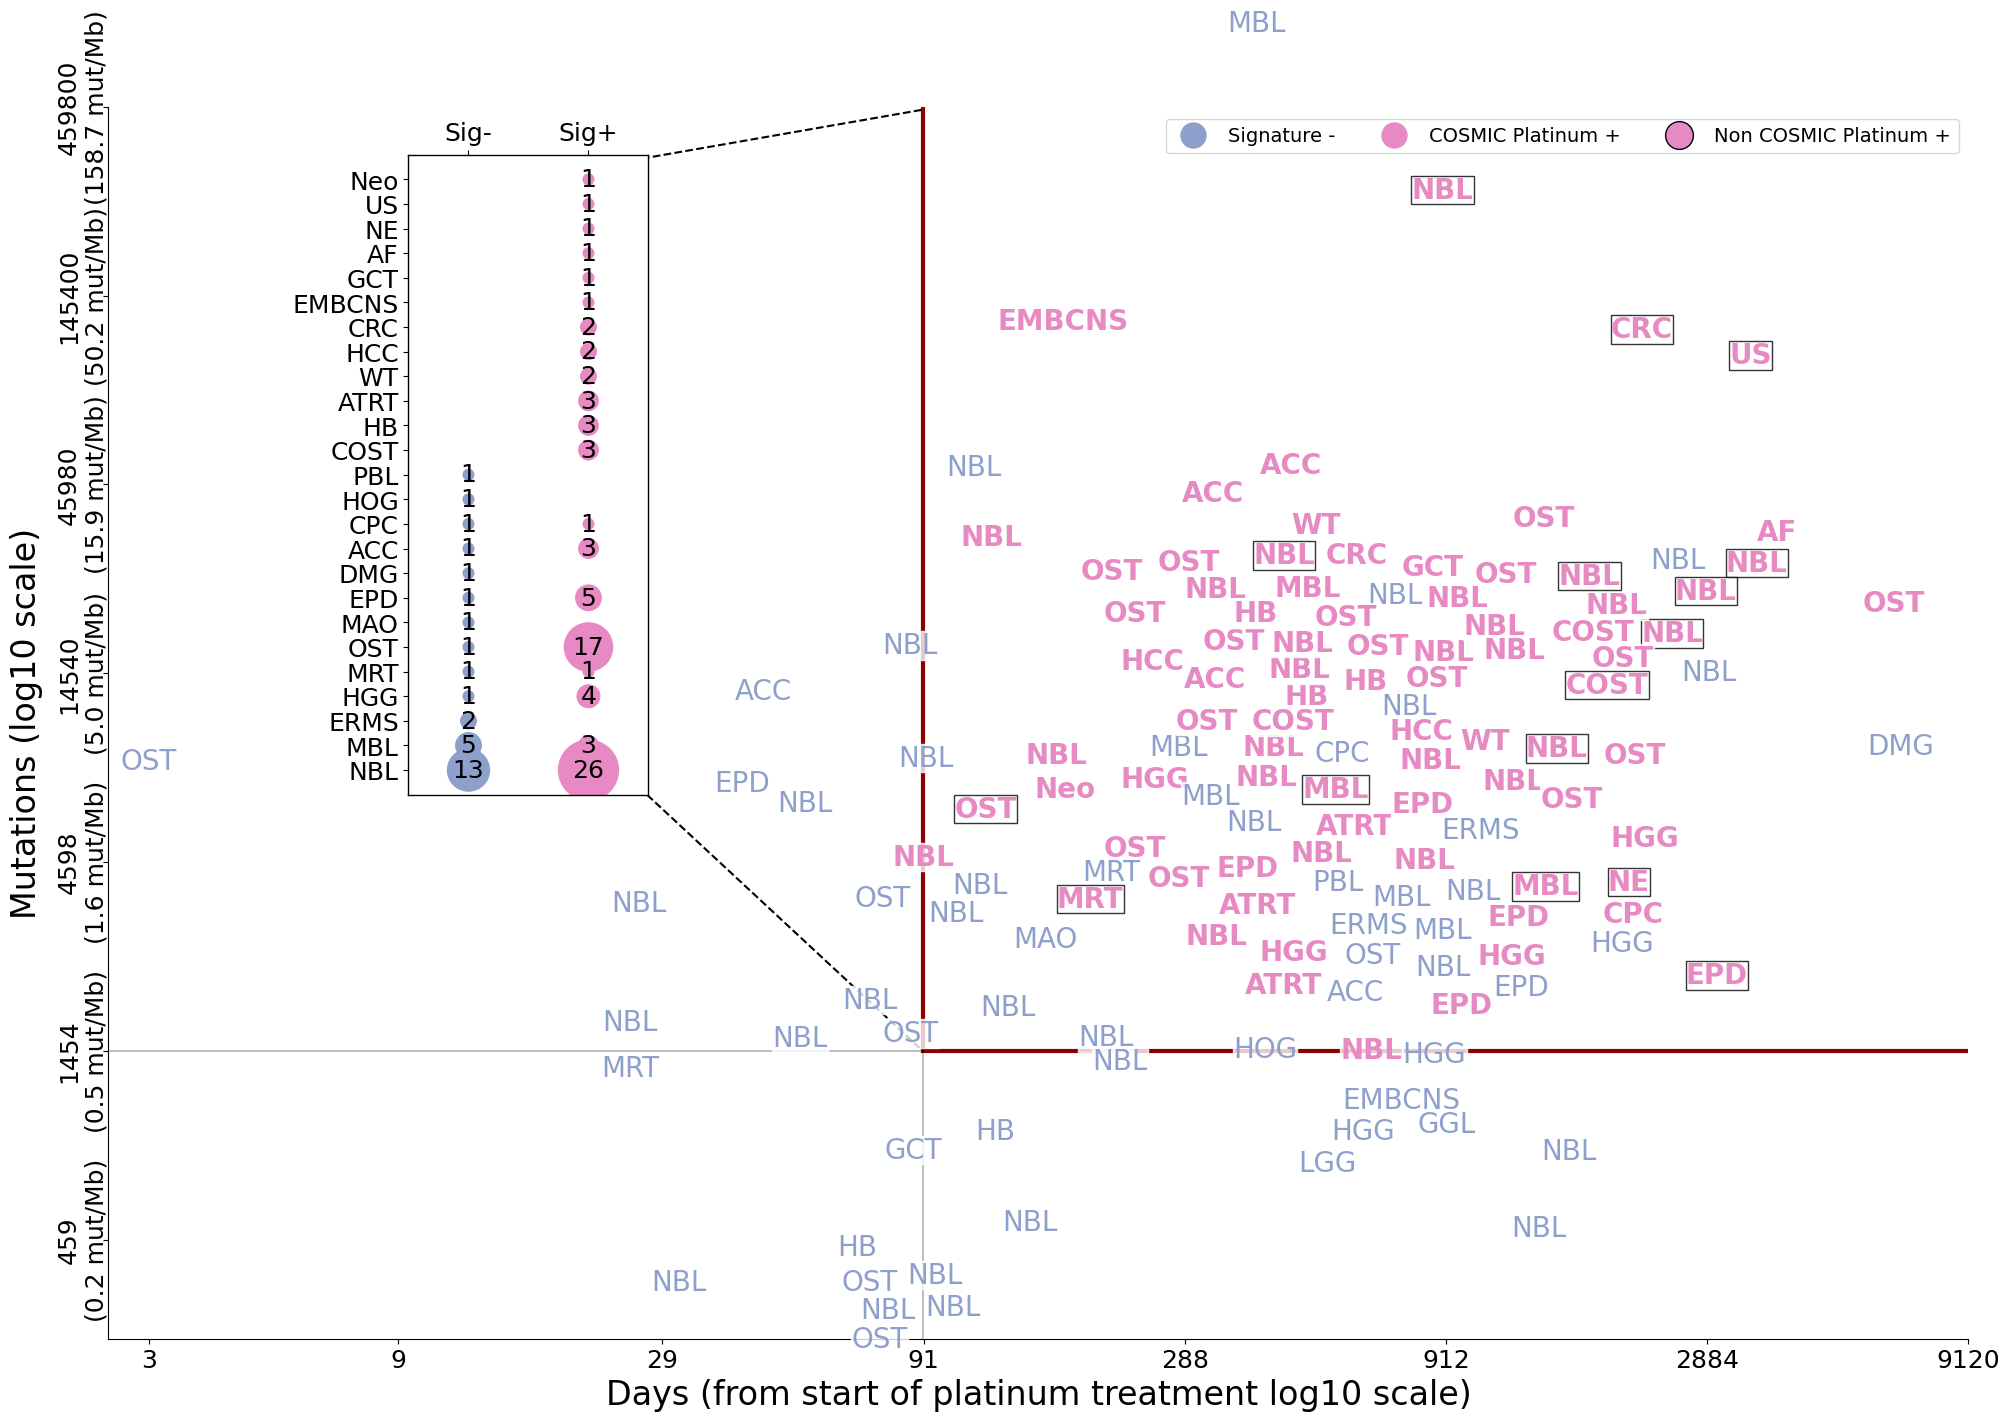

In [1240]:
pcols = []

plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in plat_df2plot.Platin_sig]
if len(plat_df2plot[plat_df2plot.Size == 0]) > 0:
    nonzero_mean = plat_df2plot[plat_df2plot.Size > 0].Size.mean()
    plat_df2plot.Size = [x if x>0 else nonzero_mean for x in plat_df2plot.Size]

plat_df2plot.Days_log = np.round(plat_df2plot.Days_log, 4)
plat_df2plot.SBS_log = np.round(plat_df2plot.SBS_log, 4)

#plat_df2plot['Tumor'] = [plat_df2plot.Tumor.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9128 else plat_df2plot.Tumor.iloc[x]+'Target' for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_log.iloc[x] for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_log.iloc[x] for x in range(plat_df2plot.shape[0])]

# NBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.0682 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.9823 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8921 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.4035 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2348 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0531 else plat_df2plot.SBS_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]+0.025 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6857 else plat_df2plot.SBS_jitter.iloc[x]+0.15 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6803 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5211 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9191 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.3228 else plat_df2plot.Days_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0212 else plat_df2plot.Days_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2022 else plat_df2plot.SBS_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2022 else plat_df2plot.Days_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 4.1838 else plat_df2plot.Days_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6355 else plat_df2plot.Days_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6902 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]


# HB 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8325 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5955 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6928 else plat_df2plot.SBS_jitter.iloc[x]+0.014 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8567 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8567 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


# OST 3.1614
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8865 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 1.8865 else plat_df2plot.Days_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4048 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4048 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.3208 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0903 else plat_df2plot.Days_jitter.iloc[x]+0.11 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0245 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0245 else plat_df2plot.Days_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7679 else plat_df2plot.SBS_jitter.iloc[x]+0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8102 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5539 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8189 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]

# MBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8751 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


# HGG 3.2962
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2962 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8014 else plat_df2plot.SBS_jitter.iloc[x]-0.09 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6684 else plat_df2plot.SBS_jitter.iloc[x]-0.09 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.1614 else plat_df2plot.Days_jitter.iloc[x]+0.18 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4425 else plat_df2plot.SBS_jitter.iloc[x]-0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4425 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

# EPD 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0542 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0542 else plat_df2plot.Days_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.5798 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

# ACC 2.7875
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7875 else plat_df2plot.SBS_jitter.iloc[x]-0.12 for x in range(plat_df2plot.shape[0])]

# COST 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2804 else plat_df2plot.SBS_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2804 else plat_df2plot.Days_jitter.iloc[x]-0.04 for x in range(plat_df2plot.shape[0])]

# WT 2.9143
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7110 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9143 else plat_df2plot.SBS_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9143 else plat_df2plot.Days_jitter.iloc[x]+0.12 for x in range(plat_df2plot.shape[0])]

# HCC 
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.4683 else plat_df2plot.Days_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]

# AF 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.5942 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]

# NE 3.2799
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2799 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.2799 else plat_df2plot.Days_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]

# GGL 2.8609
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8609 else plat_df2plot.SBS_jitter.iloc[x]-0.13 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8609 else plat_df2plot.Days_jitter.iloc[x]+0.1 for x in range(plat_df2plot.shape[0])]

# GCT 2.9335
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9335 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

# MRT 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]

# CRC 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.7896 else plat_df2plot.SBS_jitter.iloc[x]+0.04 for x in range(plat_df2plot.shape[0])]

# ATRT  
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.4850 else plat_df2plot.SBS_jitter.iloc[x]-0.15 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.4850 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.5491 else plat_df2plot.Days_jitter.iloc[x]-0.15 for x in range(plat_df2plot.shape[0])]


# MRT 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.SBS_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.3802 else plat_df2plot.Days_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]

# ERMS 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8116 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

# PBL 
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8531 else plat_df2plot.SBS_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8531 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [x+0.1 if x>3.9 else x for x in plat_df2plot['SBS_jitter']]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6665 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6031 else plat_df2plot.SBS_jitter.iloc[x]+0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6031 else plat_df2plot.Days_jitter.iloc[x]-0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.8893 else plat_df2plot.SBS_jitter.iloc[x]+0.1 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0039 else plat_df2plot.SBS_jitter.iloc[x]-0.06 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0039 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0622 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9345 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]


plat_df2plot['SBS_jitter'] = [x+0.1 if x>3.7 else x for x in plat_df2plot['SBS_jitter']]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 3.7271 else plat_df2plot.SBS_jitter.iloc[x]-0.07 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9122 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9154 else plat_df2plot.SBS_jitter.iloc[x]-0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.SBS_log.iloc[x] != 4.0634 else plat_df2plot.SBS_jitter.iloc[x]+0.08 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6425 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6425 else plat_df2plot.SBS_jitter.iloc[x]-0.14 for x in range(plat_df2plot.shape[0])]


plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.6160 else plat_df2plot.SBS_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.1614 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 3.0253 else plat_df2plot.SBS_jitter.iloc[x]+0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9191 else plat_df2plot.SBS_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_jitter.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.9890 else plat_df2plot.SBS_jitter.iloc[x]-0.03 for x in range(plat_df2plot.shape[0])]

plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.5694 else plat_df2plot.Days_jitter.iloc[x]-0.05 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.9128 else plat_df2plot.Days_jitter.iloc[x]+0.03 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.9345 else plat_df2plot.Days_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]
plat_df2plot['Days_jitter'] = [plat_df2plot.Days_jitter.iloc[x] if plat_df2plot.Days_jitter.iloc[x] != 2.8102 else plat_df2plot.Days_jitter.iloc[x]+0.02 for x in range(plat_df2plot.shape[0])]

#2.

for r in range(plat_df2plot.shape[0]):
    if plat_df2plot.cos_total.iloc[r] > 0:
        pcols.append('white')
    elif plat_df2plot.nonCos_total.iloc[r] > 0:
        pcols.append('black')
    else:
        #pcols.append(set2_cols[2])
        pcols.append('white')


# === MAIN FIGURE ===
f, ax = plt.subplots(figsize=(24,16))


# Calculate local density and adjust font size accordingly
from scipy.spatial import distance_matrix

coords = plat_df2plot[['Days_jitter', 'SBS_jitter']].values
dist_matrix = distance_matrix(coords, coords)
nearby_counts = (dist_matrix < 0.2).sum(axis=1)  # Count nearby points

for i, row in plat_df2plot.iterrows():
    # Smaller font in crowded areas
    fontsize = max(12, 16 - nearby_counts[i])
    
    ax.text(
        row['Days_jitter'], row['SBS_jitter'], row['Tumor'],
        color=row['color'],
        fontsize=20,
        ha='center', va='center',
        weight='bold' if row['Platin_sig'] == 'Y' else 'normal',
        bbox=dict(facecolor='white', edgecolor=pcols[i], pad=0.3, alpha=0.8)
    )


# === LEGEND ===
custom_lines = [
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=20),
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=20),
    Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], mec='black', ms=20)
]
leg_labels = ['Signature -', 'COSMIC Platinum +', 'Non COSMIC Platinum +']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,.998), ncol = 3, fontsize=14)

# === AXIS TICKS ===
genome_size = 2897.310462
ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
#ax.set_xticks(np.arange(0.477, 4.16, 0.05))
#ax.set_xticklabels(np.arange(0.477, 4.16, 0.05), rotation=90)
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120], fontsize=18)
ax.set_yticks([2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
#ax.set_xticks(np.arange(2, 6, 0.2))
ax.set_yticklabels([f"459\n({np.round(459/genome_size, 1)} mut/Mb)", f"1454\n({np.round(1454/genome_size, 1)} mut/Mb)", f"4598\n({np.round(4598/genome_size, 1)} mut/Mb)",
                    f"14540\n({np.round(14540/genome_size, 1)} mut/Mb)", f"45980\n({np.round(45980/genome_size, 1)} mut/Mb)", f"145400\n({np.round(145400/genome_size, 1)} mut/Mb)",
                    f"459800\n({np.round(459800/genome_size, 1)} mut/Mb)"], rotation=90, ha='center', va='center', fontsize=18)


'''ax.set_xticks(np.arange(0.477, 4.16, 0.05))
ax.set_xticklabels(np.round(np.arange(0.477, 4.16, 0.05), 4), rotation=90)
ax.set_yticks(np.arange(2, 6, 0.2))
ax.set_yticklabels(np.round(np.arange(2, 6, 0.2),4))'''

ax.tick_params(axis='y', which='major', pad=15)
# === LIMITS AND GUIDE LINES ===
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = plat_df2plot[plat_df2plot.Platin_sig=='Y'].Days_log.min()
min_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.min()
max_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.max()

plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)

'''rect = patches.Rectangle((min_day, min_sbs), x_max-min_day, max_sbs,
                         linewidth=2.5, edgecolor='darkred', facecolor='none')
ax.add_patch(rect)'''

plt.axvline(min_day, 0.235, 1, color="darkred", linewidth=3)
plt.axhline(min_sbs, 0.438, 1, color="darkred", linewidth=3)

ax.set_ylabel('Mutations (log10 scale)', labelpad=10, fontsize=24)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=24)

# === FORCE Y-AXIS TO START AT 2.3 ===
ax.set_xlim(left=0.4, right=x_max)
ax.set_ylim(bottom=2.4, top=y_max)

ax.spines[['top', 'right']].set_visible(False)

# === INSET PLOT ===
type_sig_mlt = ut.get_type_numbers(
    plat_df2plot[(plat_df2plot.SBS_log>=min_sbs) & (plat_df2plot.Days_log>=min_day)].copy()
)

x1, y1 = [1.4, 1.96], [3.88, 3.16]
x2, y2 = [1.4, 1.96], [5.52, 5.655]
plt.plot(x1, y1, x2, y2, color='black', linestyle='--')

# Keep your inset as-is
ax2 = f.add_axes([0.25, 0.45, 0.1, 0.4])
ax2.scatter(
    type_sig_mlt.Sig, type_sig_mlt.Tumor,
    edgecolors='k', s=type_sig_mlt.Count*75, c=type_sig_mlt.Color,
    zorder=2, linewidths=0
)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
ax2.xaxis.tick_top()
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([-0.5, 1.5])
plt.ylim([-1, type_sig_mlt.shape[0]/2])

for i, txt in enumerate(type_sig_mlt.Count):
    if pd.notna(txt) and txt != 0:
        ax2.annotate(int(np.round(txt)), (type_sig_mlt.Sig[i], type_sig_mlt.Tumor[i]),
                     fontsize=18, ha='center', va='center')



plt.savefig(os.path.join(fig_out, 'Fig_4a_rev.pdf'), bbox_inches="tight")

In [1155]:
plat_df2plot[plat_df2plot.Tumor=='EPD'].iloc[:,-16:].sort_values('Days_log')

,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color,Days_jitter,SBS_jitter
51,Y,N,5892,227.272727,1.6128,3.7703,N,N,N,N,NYN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796...",1.6128,3.8703
71,N,N,4730,119.047619,2.5798,3.6749,Y,Y,Y,N,YNN,2709.0,59.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.5798,3.6449
70,N,N,6257,119.047619,2.9154,3.7964,Y,Y,Y,N,YNN,5839.0,147.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.9154,3.8164
73,Y,N,2059,193.181818,2.9890,3.3137,Y,Y,N,N,NYN,372.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.9890,3.3137
44,Y,N,2455,113.636364,3.0542,3.3901,N,N,N,N,NYN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796...",3.1042,3.3301
72,N,N,3274,119.047619,3.0993,3.5151,Y,Y,Y,N,YNN,1483.0,81.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",3.0993,3.5151
24,Y,N,2300,295.454545,3.4784,3.3617,Y,N,Y,N,NYN,0.0,25.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",3.4784,3.3617


In [1162]:
plat_df2plot[(plat_df2plot.Tumor=='NBL') & (plat_df2plot.Platin_sig=='Y')].iloc[:,-16:].sort_values('Days_log')

,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color,Days_jitter,SBS_jitter
130,Y,N,4736,215.079365,1.9590,3.6754,Y,Y,Y,N,YYN,1925.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",1.9590,3.6754
93,Y,N,20979,354.256854,2.0899,4.3218,Y,Y,Y,Y,YYN,6875.0,7513.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.0899,4.5218
92,Y,N,7008,354.256854,2.2148,3.8456,Y,Y,Y,N,YYN,4590.0,36.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.2148,3.9456
33,N,N,3684,1000.000000,2.5211,3.5663,Y,Y,N,N,YNN,561.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.5211,3.4663
101,Y,N,6879,354.256854,2.6160,3.8375,Y,Y,Y,Y,YYN,1823.0,1423.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6160,3.8875
52,N,N,7328,161.380952,2.6294,3.8650,Y,Y,N,N,YNN,1523.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6294,3.9650
94,N,N,15270,158.730159,2.6294,4.1838,Y,Y,Y,N,YNN,5253.0,58.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.5194,4.3838
46,N,N,7803,158.730159,2.6803,3.8923,Y,Y,Y,N,YNN,1028.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6803,4.1723
135,N,N,7800,241.800208,2.6857,3.8921,Y,Y,Y,N,YNN,2945.0,99.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6857,4.2421
100,Y,N,18792,354.256854,2.6902,4.2740,Y,N,Y,N,YYN,0.0,61.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6502,4.4740


In [1064]:
plat_df2plot[(plat_df2plot.Tumor=='OST') & (plat_df2plot.Platin_sig=='Y')].iloc[:,-16:].sort_values('Days_log')

,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color,Days_jitter,SBS_jitter
140,N,N,5037,241.800208,2.0792,3.7022,Y,Y,Y,N,YNN,0.0,1258.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.0792,3.7022
111,N,N,13175,95.238095,2.3636,4.1198,Y,Y,Y,N,YNN,3084.0,3752.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.3636,4.2198
138,N,N,21429,241.800208,2.3802,4.3310,Y,Y,Y,N,YNN,21552.0,337.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.3202,4.3310
23,N,N,6008,380.952381,2.4048,3.7787,Y,Y,Y,N,YNN,3393.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.3648,3.6987
56,N,N,4161,195.000000,2.4487,3.6192,Y,Y,Y,N,YNN,3027.0,95.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.4487,3.6192
5,N,N,18039,142.857143,2.4669,4.2562,Y,Y,Y,N,YNN,2416.0,3475.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.4669,4.3562
109,N,N,9239,95.238095,2.5539,3.9656,Y,Y,Y,N,YNN,2941.0,2868.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.5539,4.1456
120,N,N,7522,250.000000,2.6031,3.8763,Y,Y,Y,Y,YNN,71.0,3167.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.6031,3.8763
112,N,N,10968,95.238095,2.7679,4.0401,Y,Y,Y,N,YNN,2239.0,4084.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.7679,4.2101
35,N,N,9850,253.968254,2.8102,3.9934,Y,Y,Y,N,YNN,6070.0,281.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.8102,4.1334


In [894]:
plat_df2plot[plat_df2plot.Tumor=='EPD'].iloc[:,-16:]

,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color,Days_jitter,SBS_jitter
24,Y,N,2300,295.454545,3.4784,3.3617,Y,N,Y,N,NYN,0.0,25.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",3.4784,3.3617
44,Y,N,2455,113.636364,3.0542,3.3901,N,N,N,N,NYN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796...",3.0542,3.3901
51,Y,N,5892,227.272727,1.6128,3.7703,N,N,N,N,NYN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796...",1.6128,3.7703
70,N,N,6257,119.047619,2.9154,3.7964,Y,Y,Y,N,YNN,5839.0,147.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.9154,3.7964
71,N,N,4730,119.047619,2.5798,3.6749,Y,Y,Y,N,YNN,2709.0,59.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.5798,3.6749
72,N,N,3274,119.047619,3.0993,3.5151,Y,Y,Y,N,YNN,1483.0,81.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",3.0993,3.5151
73,Y,N,2059,193.181818,2.9890,3.3137,Y,Y,N,N,NYN,372.0,0.0,"(0.9058823529411765, 0.5411764705882353, 0.764...",2.9890,3.3137


In [902]:
plat_df2plot[plat_df2plot.Tumor=='GGL'].iloc[:,-16:]

,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color,Days_jitter,SBS_jitter
74,Y,N,1250,106.060606,2.8609,3.0969,N,N,N,N,NYN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796...",2.8609,3.0969


In [733]:
[x for x in plat_df2plot.Tumor if x.startswith('H')]

['HGG',
 'HB',
 'HB',
 'HBTarget',
 'HGG',
 'HB',
 'HCC',
 'HCC',
 'HGG',
 'HGG',
 'HGG',
 'HGG',
 'HGG',
 'HOG',
 'HB']

In [707]:
plat_df2plot[(plat_df2plot.Days_from>400) & (plat_df2plot.Days_from<9000) & (plat_df2plot.Tumor.isin(['GGL']))& (plat_df2plot.Platin_sig=='Y')].iloc[:,0:16]

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log,Platin_sig


In [ ]:
plat_df2plot['SBS_jitter'] = [plat_df2plot.SBS_log.iloc[x] if plat_df2plot.Days_log.iloc[x] != 2.629410 else plat_df2plot.SBS_log.iloc[x]+0.05 for x in plat_df2plot.shape[0]]

0      2.9335
1      3.0622
2      2.7896
3      0.4771
4      1.8751
        ...  
136    3.1477
137    2.9191
138    2.3802
139    2.8176
140    2.0792
Name: Days_log, Length: 141, dtype: float64

In [640]:
plat_df2plot.head()

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,color
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,...,2.933487,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0,"(0.9058823529411765, 0.5411764705882353, 0.764..."
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,...,3.062206,3.584557,N,N,N,N,YNN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796..."
2,KiCS0008_289185,Y,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,...,2.789581,4.235124,Y,N,Y,N,NNY,110.0,47.0,"(0.9058823529411765, 0.5411764705882353, 0.764..."
3,KiCS0010_270645,Y,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,...,0.477121,3.830011,N,N,N,N,YNN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796..."
4,KiCS0010_270646,N,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,...,1.875061,2.399674,N,N,N,N,YNN,0.0,0.0,"(0.5529411764705883, 0.6274509803921569, 0.796..."


In [609]:
y_min

0.0

-----------
## Panel b

In [549]:
KZM_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_dates.tsv'), sep='\t', index_col=0)

In [550]:
gen_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'DBS4', 'ID8', 'SBS288L3', 'DBS9', 'ID3', 'SBS288L4', 'SBS288L2']
plat_enr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']

In [551]:
kzm611_gen_thr_sigs = kzm611_sigs[gen_thr_sigs].copy()
kzm611_gen_thr_sigs.head(3)

,SBS35,DBS78H2,SBS31,SBS288L5,DBS5,DBS2,DBS6,DBS4,ID8,SBS288L3,DBS9,ID3,SBS288L4,SBS288L2
I-H-108298-T1-1-D1-1,1868,0.0,0,0,60.0,80.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108317-T1-1-D1-1,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108319-T1-1-D1-1,2833,57.0,0,0,0.0,25.0,0.0,0.0,0,0,0.0,0,0,0


In [552]:
## Subset post-therapy samples
kzm611_gen_thr_sigs_v2 = kzm611_gen_thr_sigs.loc[[x for x in kzm611_gen_thr_sigs.index if x  in kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()]].copy()
kzm611_gen_thr_sigs_v2.shape

(349, 14)

In [553]:
KZM_dates_gen_thr = KZM_dates[KZM_dates.Days_from > 0].copy()
KZM_dates_gen_thr['Months'] = [np.ceil(x/30) for x in KZM_dates_gen_thr.Days_from]
KZM_dates_gen_thr['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in KZM_dates_gen_thr.index]
KZM_dates_gen_thr.head()

,Sample_date,Days_from,Months,sigsYN
KiCS0002_321321,2015-05-15,858.0,29.0,Y
KiCS0006_274243,2015-05-24,1198.0,40.0,N
KiCS0007_302948,2015-02-20,15.0,1.0,N
KiCS0008_289185,2016-07-06,762.0,26.0,Y
KiCS0010_270645,2014-04-01,3.0,1.0,N


In [1247]:
gen_months_dict = {}
for mo in KZM_dates_gen_thr.Months.unique():
    subd = KZM_dates_gen_thr[KZM_dates_gen_thr.Months<=mo]
    
    if 'Y' in subd.sigsYN.tolist():
        gen_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        gen_months_dict[mo] = 0
months_gen_sigs_df = pd.DataFrame.from_dict(gen_months_dict, orient='index')
months_gen_sigs_df.columns = ['Patients_Percent']
months_gen_sigs_df['Months'] = months_gen_sigs_df.index.tolist()
months_gen_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.235294,29.0
40.0,0.265060,40.0


In [1246]:
all_plat_sigs_df_v2 = all_plat_sigs_df.copy()
all_plat_sigs_df_v2['Months'] = [np.ceil(x/30) for x in all_plat_sigs_df_v2.Days_from]
plat_months_dict = {}
for mo in all_plat_sigs_df_v2.Months.unique():
    subd = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        plat_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        plat_months_dict[mo] = 0
months_plat_sigs_df = pd.DataFrame.from_dict(plat_months_dict, orient='index')
months_plat_sigs_df.columns = ['Patients_Percent']
months_plat_sigs_df['Months'] = months_plat_sigs_df.index.tolist()
months_plat_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.504950,29.0
39.0,0.513514,39.0


In [555]:
all_plat_sigs_df_v2['Thr_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_sigs_df_v2.Sample_id]
all_plat_sigs_df_v2.head(2)

,Sample_id,Metastatic,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,...,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,Months,Thr_State
0,KiCS0002_321321,Y,KiCS0002,GCT,858,0.198413,0.636364,0.0,Y,Y,...,4.182044,Y,Y,Y,Y,YYN,15254.0,588.0,29.0,Advanced-Treated
1,KiCS0006_274243,Y,KiCS0006,NBL,1154,0.158730,0.000000,0.0,Y,N,...,3.584557,N,N,N,N,YNN,0.0,0.0,39.0,Advanced-Treated


In [332]:
all_plat_sigs_df_v2.Thr_State.value_counts()

Thr_State
Advanced-Treated    103
Primary-Treated      38
Name: count, dtype: int64

In [333]:
all_plat_sigs_PT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Primary-Treated'].copy()
pt_months_dict = {}
for mo in all_plat_sigs_PT.Months.unique():
    subd = all_plat_sigs_PT[all_plat_sigs_PT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        pt_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        pt_months_dict[mo] = 0
months_pt_sigs_df = pd.DataFrame.from_dict(pt_months_dict, orient='index')
months_pt_sigs_df.columns = ['Patients_Percent']
months_pt_sigs_df['Months'] = months_pt_sigs_df.index.tolist()
months_pt_sigs_df.head(2)

,Patients_Percent,Months
3.0,0.000000,3.0
4.0,0.052632,4.0


In [538]:
all_plat_sigs_PT.head()

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total,Months,Thr_State
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.0,Y,N,N,...,2.399674,N,N,N,N,YNN,0.0,0.0,3.0,Primary-Treated
9,KiCS0032_276054,KiCS0032,NBL,114,0.158730,0.000000,0.0,Y,N,N,...,4.508099,N,N,N,N,YNN,0.0,0.0,4.0,Primary-Treated
10,KiCS0038_287533,KiCS0038,HB,125,0.226190,0.205379,0.0,Y,Y,N,...,2.949390,N,N,N,N,YYN,0.0,0.0,5.0,Primary-Treated
20,KiCS0091_301892,KiCS0091,NBL,96,0.158730,0.000000,0.0,Y,N,N,...,2.518514,N,N,N,N,YNN,0.0,0.0,4.0,Primary-Treated
22,KiCS0099_301444,KiCS0099,NBL,72,0.158730,0.000000,0.0,Y,N,N,...,3.297104,N,N,N,N,YNN,0.0,0.0,3.0,Primary-Treated


In [334]:
all_plat_sigs_AT = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Thr_State=='Advanced-Treated'].copy()
at_months_dict = {}
for mo in all_plat_sigs_AT.Months.unique():
    subd = all_plat_sigs_AT[all_plat_sigs_AT.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        at_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        at_months_dict[mo] = 0
months_at_sigs_df = pd.DataFrame.from_dict(at_months_dict, orient='index')
months_at_sigs_df.columns = ['Patients_Percent']
months_at_sigs_df['Months'] = months_at_sigs_df.index.tolist()
months_at_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.621212,29.0
39.0,0.618421,39.0


In [564]:
all_plat_sigs_AT.shape, all_plat_sigs_PT.shape

((103, 23), (38, 23))

In [556]:
all_plat_sigs_MTN = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Metastatic=='N'].copy()
mtn_months_dict = {}
for mo in all_plat_sigs_MTN.Months.unique():
    subd = all_plat_sigs_MTN[all_plat_sigs_MTN.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        mtn_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        mtn_months_dict[mo] = 0
months_mtn_sigs_df = pd.DataFrame.from_dict(mtn_months_dict, orient='index')
months_mtn_sigs_df.columns = ['Patients_Percent']
months_mtn_sigs_df['Months'] = months_mtn_sigs_df.index.tolist()
months_mtn_sigs_df.head(2)

,Patients_Percent,Months
3.0,0.000,3.0
10.0,0.125,10.0


In [557]:
all_plat_sigs_MTP = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Metastatic=='Y'].copy()
mtp_months_dict = {}
for mo in all_plat_sigs_MTP.Months.unique():
    subd = all_plat_sigs_MTP[all_plat_sigs_MTP.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        mtp_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        mtp_months_dict[mo] = 0
months_mtp_sigs_df = pd.DataFrame.from_dict(mtp_months_dict, orient='index')
months_mtp_sigs_df.columns = ['Patients_Percent']
months_mtp_sigs_df['Months'] = months_mtp_sigs_df.index.tolist()
months_mtp_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.689655,29.0
39.0,0.694444,39.0


In [562]:
all_plat_sigs_MTP.shape, all_plat_sigs_MTN.shape

((47, 24), (37, 24))

In [335]:
antimets_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_antimetabolites.tsv'), sep='\t', index_col=0)
anthra_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_anthracyclines.tsv'), sep='\t', index_col=0)

anthra_dates = anthra_dates[anthra_dates.Days_from > 0].copy()
anthra_dates['Months'] = [np.ceil(x/30) for x in anthra_dates.Days_from]

antimets_dates = antimets_dates[antimets_dates.Days_from > 0].copy()
antimets_dates['Months'] = [np.ceil(x/30) for x in antimets_dates.Days_from]
anthra_dates.shape, antimets_dates.shape

((82, 7), (31, 7))

In [336]:
anthra_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in anthra_dates.index]
antimets_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in antimets_dates.index]

In [1245]:
anthra_months_dict = {}
for mo in anthra_dates.Months.unique():
    subd = anthra_dates[anthra_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        anthra_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        anthra_months_dict[mo] = 0
anthra_months_sigs = pd.DataFrame.from_dict(anthra_months_dict, orient='index')
anthra_months_sigs.columns = ['Patients_Percent']
anthra_months_sigs['Months'] = anthra_months_sigs.index.tolist()
anthra_months_sigs.head(2)

,Patients_Percent,Months
38.0,0.4375,38.0
1.0,0.0000,1.0


In [1244]:
antimets_months_dict = {}
for mo in antimets_dates.Months.unique():
    subd = antimets_dates[antimets_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        antimets_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        antimets_months_dict[mo] = 0
antimets_months_sigs = pd.DataFrame.from_dict(antimets_months_dict, orient='index')
antimets_months_sigs.columns = ['Patients_Percent']
antimets_months_sigs['Months'] = antimets_months_sigs.index.tolist()
antimets_months_sigs.head(2)

,Patients_Percent,Months
2.0,0.000000,2.0
10.0,0.214286,10.0


In [340]:
months_gen_sigs_df.Patients_Percent = months_gen_sigs_df.Patients_Percent * 100
months_gen_sigs_df.head()

,Patients_Percent,Months
29.0,23.529412,29.0
40.0,26.506024,40.0
1.0,0.000000,1.0
26.0,22.222222,26.0
3.0,9.375000,3.0


In [1250]:
months_gen_sigs_df.Patients_Percent = months_gen_sigs_df.Patients_Percent * 100
months_plat_sigs_df.Patients_Percent = months_plat_sigs_df.Patients_Percent * 100

In [1248]:
anthra_months_sigs.Patients_Percent = anthra_months_sigs.Patients_Percent * 100
antimets_months_sigs.Patients_Percent = antimets_months_sigs.Patients_Percent * 100


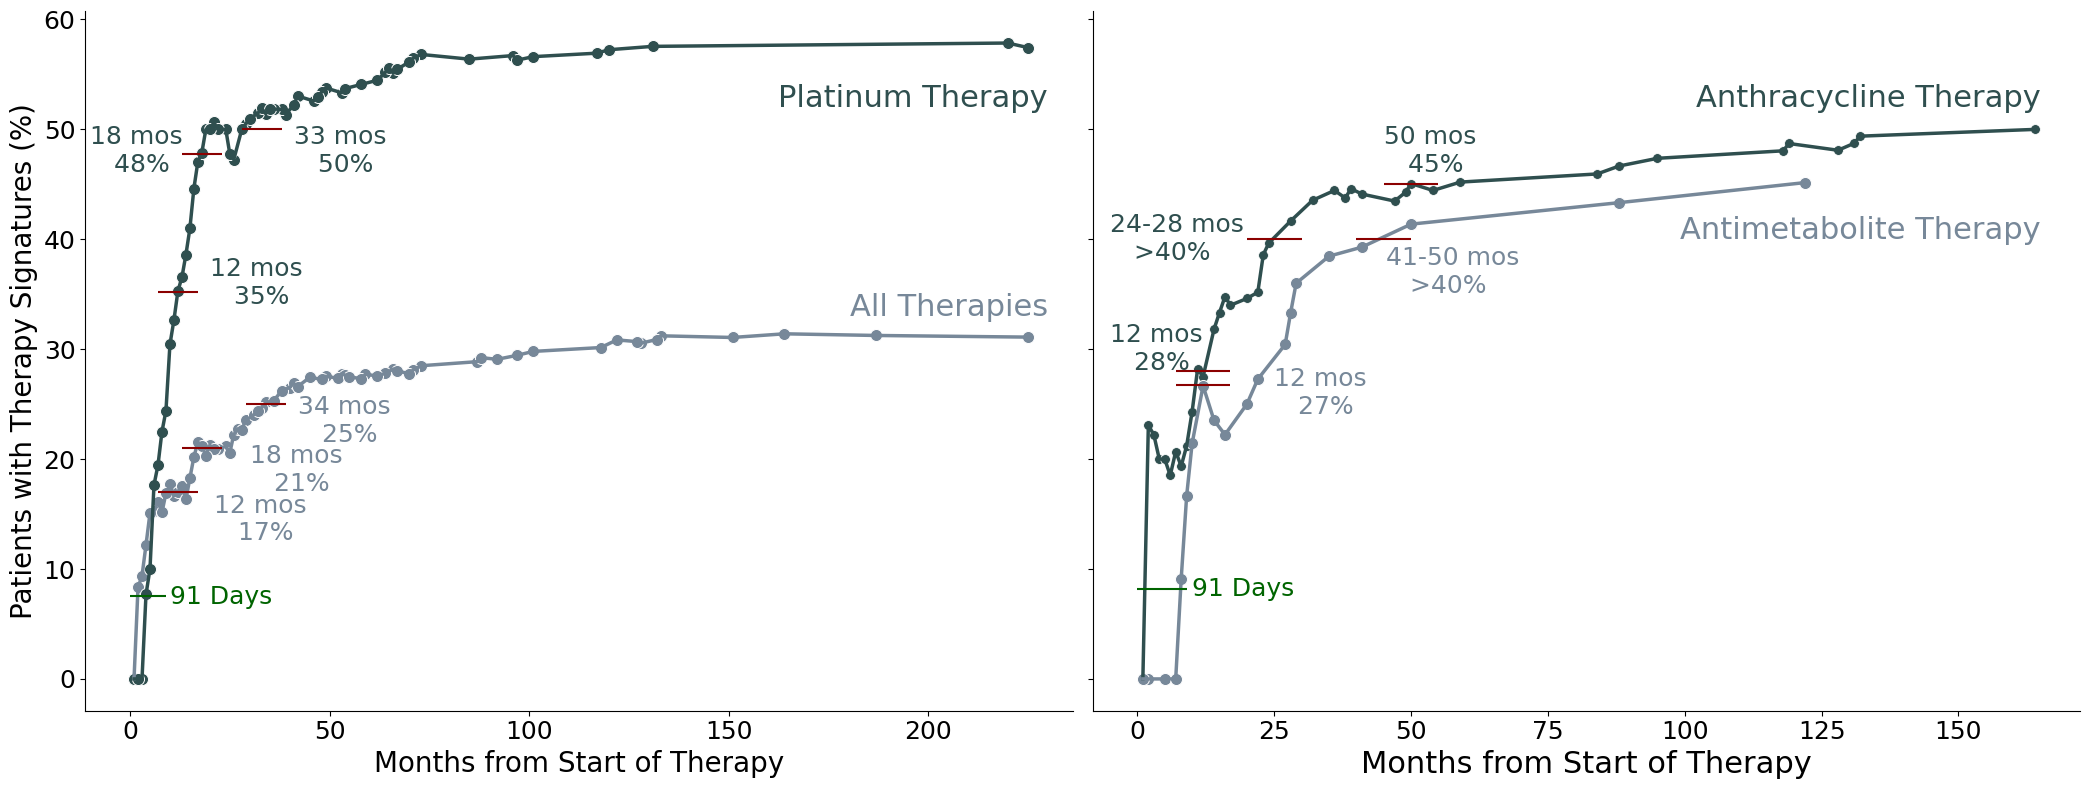

In [1263]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, axes = plt.subplots(1,2, figsize=(21, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.lineplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', s=75)



ax2 = sns.lineplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

axes[0].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[0].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
axes[0].spines[['right', 'top']].set_visible(False)

axes[0].hlines(17, color='darkred', xmin=7, xmax=17)
axes[0].hlines(21, color='darkred', xmin=13, xmax=23)
axes[0].hlines(25, color='darkred', xmin=29, xmax=39)
#axes[0].hlines(0.27, color='darkred', xmin=40, xmax=50)
ax1.text(21, 14.5, '12 mos\n   17%', va='center', color='lightslategrey', fontsize=18)
ax1.text(30, 19, '18 mos\n   21%', va='center', color='lightslategrey', fontsize=18)
ax1.text(42, 23.5, '34 mos\n   25%', va='center', color='lightslategrey', fontsize=18)
#ax1.text(35, 0.29, '45 mos\n   27%', va='center', color='lightslategrey', fontsize=18)

axes[0].hlines(35.2, color='darkred', xmin=7, xmax=17)
axes[0].hlines(47.8, color='darkred', xmin=13, xmax=23)
axes[0].hlines(50, color='darkred', xmin=28, xmax=38)
axes[0].text(20, 36, '12 mos\n   35%', va='center', color='darkslategrey', fontsize=18)
axes[0].text(-10, 48, '18 mos\n   48%', va='center', color='darkslategrey', fontsize=18)
axes[0].text(41, 48, '33 mos\n   50%', va='center', color='darkslategrey', fontsize=18)



axes[0].text(230, 52, 'Platinum Therapy', ha='right', color='darkslategrey', fontsize=22)
axes[0].text(230, 33, 'All Therapies', ha='right', color='lightslategrey', fontsize=22)


ax3 = sns.lineplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', linewidth=2.5)
ax3 = sns.scatterplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', s=50)

ax4 = sns.lineplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', linewidth=2.5)
ax4 = sns.scatterplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', s=75)

axes[1].set_xlabel('Months from Start of Therapy', fontsize=22)
axes[1].set_ylabel('Patients with Therapy Signatures (%)', fontsize=22)
axes[1].set_title('', fontsize=18)

axes[1].hlines(28, color='darkred', xmin=7, xmax=17)
axes[1].hlines(40, color='darkred', xmin=20, xmax=30)
axes[1].hlines(45, color='darkred', xmin=45, xmax=55)
axes[1].text(-5, 30, '12 mos\n   28%', va='center', color='darkslategrey', fontsize=18)
axes[1].text(-5, 40, '24-28 mos\n   >40%', va='center', color='darkslategrey', fontsize=18)
axes[1].text(45, 48, '50 mos\n   45%', va='center', color='darkslategrey', fontsize=18)

axes[1].hlines(26.7, color='darkred', xmin=7, xmax=17)
axes[1].hlines(40, color='darkred', xmin=40, xmax=50)
axes[1].text(25, 26, '12 mos\n   27%', va='center', color='lightslategrey', fontsize=18)
axes[1].text(45.5, 37, '41-50 mos\n   >40%', va='center', color='lightslategrey', fontsize=18)

axes[1].text(165, 52, 'Anthracycline Therapy', ha='right', color='darkslategrey', fontsize=22)
axes[1].text(165, 40, 'Antimetabolite Therapy', ha='right', color='lightslategrey', fontsize=22)

axes[1].spines[['right', 'top']].set_visible(False)

axes[0].hlines(7.5, color='darkgreen', xmin=0, xmax=9)
axes[0].text(10, 7.5, '91 Days', va='center', color='darkgreen', fontsize=18)
axes[1].hlines(8.2, color='darkgreen', xmin=0, xmax=9)
axes[1].text(10, 8.2, '91 Days', va='center', color='darkgreen', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'Fig_4bc_rev.pdf'), bbox_inches="tight")

In [567]:
months_pt_sigs_df.Patients_Percent = months_pt_sigs_df.Patients_Percent / 100
months_at_sigs_df.Patients_Percent = months_at_sigs_df.Patients_Percent / 100

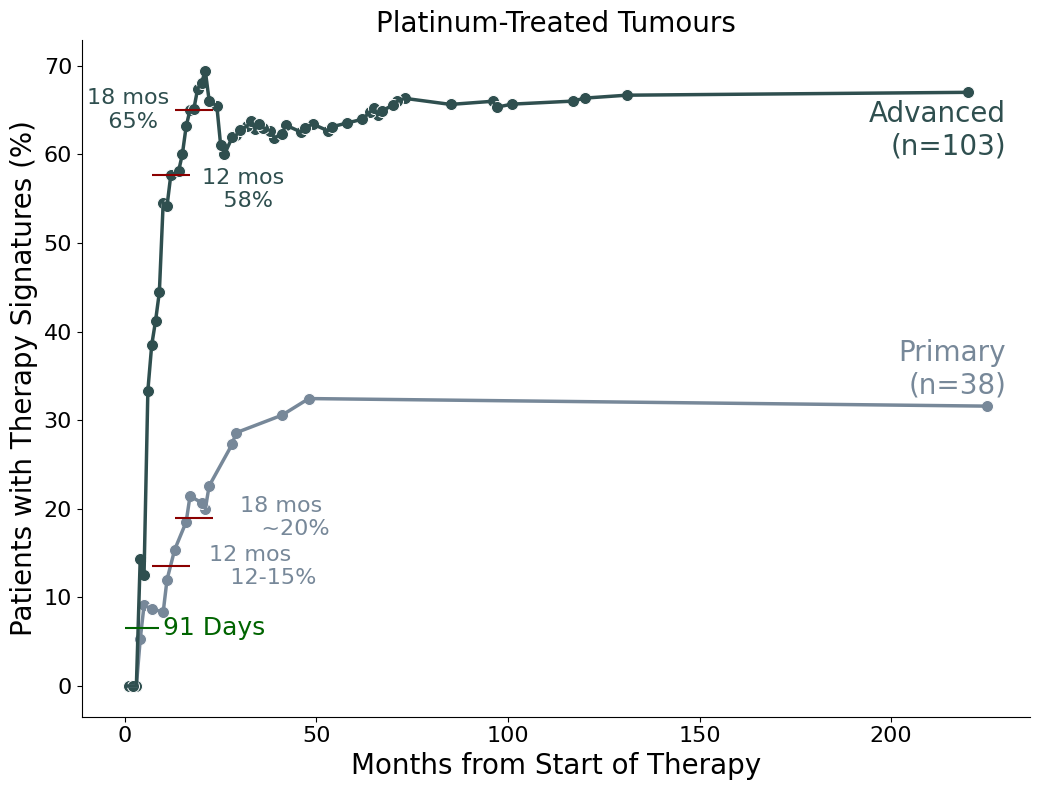

In [569]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10.5, 8))

ax1 = sns.lineplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_pt_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_at_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

ax.set_xlabel('Months from Start of Therapy', fontsize=20)
ax.set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

ax.hlines(13.5, color='darkred', xmin=7, xmax=17)
ax.hlines(19, color='darkred', xmin=13, xmax=23)
ax1.text(22, 13.5, '12 mos\n   12-15%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 19, '18 mos\n   ~20%', va='center', color='lightslategrey', fontsize=16)

ax.hlines(57.6923, color='darkred', xmin=7, xmax=17)
ax.hlines(65, color='darkred', xmin=13, xmax=23)
ax.text(20, 56, '12 mos\n   58%', va='center', color='darkslategrey', fontsize=16)
ax.text(-10, 65, '18 mos\n   65%', va='center', color='darkslategrey', fontsize=16)

ax.text(230, 60, 'Advanced\n(n=103)', ha='right', color='darkslategrey', fontsize=20)
ax.text(230, 33, 'Primary\n(n=38)', ha='right', color='lightslategrey', fontsize=20)

ax.set_title('Platinum-Treated Tumours', fontsize=20)


ax.hlines(6.5, color='darkgreen', xmin=0, xmax=9)
ax.text(10, 6.5, '91 Days', va='center', color='darkgreen', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")

In [560]:
months_mtp_sigs_df.Patients_Percent = months_mtp_sigs_df.Patients_Percent * 100
months_mtn_sigs_df.Patients_Percent = months_mtn_sigs_df.Patients_Percent * 100

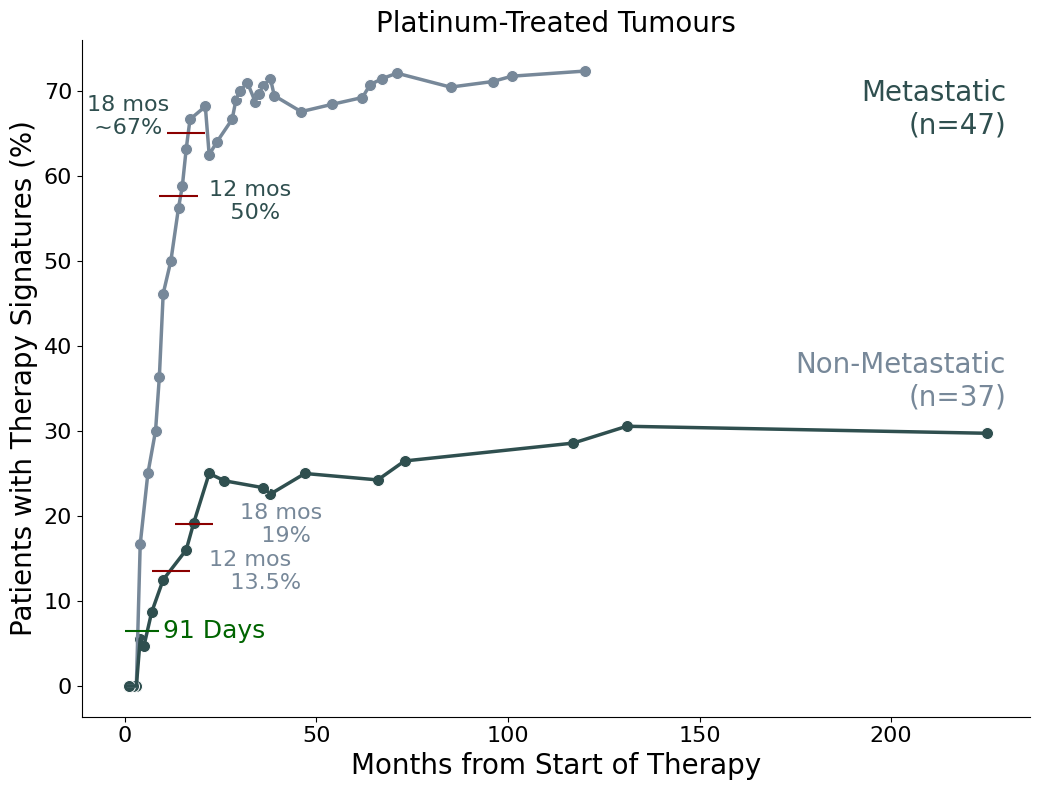

In [581]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(10.5, 8))

ax1 = sns.lineplot(data=months_mtp_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_mtp_sigs_df, x="Months", y="Patients_Percent", color='lightslategrey', s=75)

ax2 = sns.lineplot(data=months_mtn_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_mtn_sigs_df, x="Months", y="Patients_Percent", color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

ax.set_xlabel('Months from Start of Therapy', fontsize=20)
ax.set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

ax.hlines(13.5, color='darkred', xmin=7, xmax=17)
ax.hlines(19, color='darkred', xmin=13, xmax=23)
ax1.text(22, 13.5, '12 mos\n   13.5%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 19, '18 mos\n   19%', va='center', color='lightslategrey', fontsize=16)

ax.hlines(57.6923, color='darkred', xmin=9, xmax=19)
ax.hlines(65, color='darkred', xmin=11, xmax=21)
ax.text(22, 57, '12 mos\n   50%', va='center', color='darkslategrey', fontsize=16)
ax.text(-10, 67, '18 mos\n ~67%', va='center', color='darkslategrey', fontsize=16)

ax.text(230, 65, 'Metastatic\n(n=47)', ha='right', color='darkslategrey', fontsize=20)
ax.text(230, 33, 'Non-Metastatic\n(n=37)', ha='right', color='lightslategrey', fontsize=20)

ax.set_title('Platinum-Treated Tumours', fontsize=20)


ax.hlines(6.5, color='darkgreen', xmin=0, xmax=9)
ax.text(10, 6.5, '91 Days', va='center', color='darkgreen', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'SuppFig_8_rev.pdf'), bbox_inches="tight")

In [573]:
months_mtn_sigs_df.sort_values(['Months'])

,Patients_Percent,Months
1.0,0.000000,1.0
2.0,0.000000,2.0
3.0,0.000000,3.0
4.0,5.555556,4.0
5.0,4.761905,5.0
7.0,8.695652,7.0
10.0,12.500000,10.0
16.0,16.000000,16.0
18.0,19.230769,18.0
22.0,25.000000,22.0


In [574]:
months_mtp_sigs_df.sort_values(['Months'])

,Patients_Percent,Months
1.0,0.000000,1.0
3.0,0.000000,3.0
4.0,16.666667,4.0
6.0,25.000000,6.0
8.0,30.000000,8.0
9.0,36.363636,9.0
10.0,46.153846,10.0
12.0,50.000000,12.0
14.0,56.250000,14.0
15.0,58.823529,15.0
